# N-layer Neural Network
## *Réseau de neurones à N-couches*

### Les données d'entrées s'écrivent :
$\Large
X = 
\begin{bmatrix}
x_1^{1} & x_1^{2} & ... & x_1^{m} \\
x_2^{1} & x_2^{2} & ... & x_2^{m}
\end{bmatrix}
$
&emsp;
$\Large X \in \mathbb{R}^{n^{[0]} \times m}$
&emsp;
$;$ &emsp; &emsp;
$\Large
y = 
\begin{bmatrix}
y^{1} & y^{2} & ... & y^{m}
\end{bmatrix}
$
&emsp;
$\Large y \in \mathbb{R}^{1 \times m}$


## Z and W matrices for each layer (*forward propagation*)
### *Les matrices Z et W pour chaque couche* :<br> </br>
$\Large 
\left\{
    \begin{array}{ll}
        Z^{[1]} = W^{[1]}.X + b^{[1]} & \text{: \,first layer} \\
        \\
        Z^{[2]} = W^{[2]}.A^{[1]} + b^{[2]} & \text{: \,second layer} \\
        \\
        ... & ...\\ 
        \\
        Z^{[N]} = W^{[N]}.A^{[N-1]} + b^{[N]} & \text{: \,N-th layer} \\
    \end{array}
\right.
$

&emsp; $\Large and$ &emsp; $\Large A^{[N]} = \dfrac{1}{1+e^{-Z^{[N]}}}$

## The dimensions for these matrices
### *Les dimensions de ces matrices :*

### $ Z^{[1]},A^{[1]} \in \mathbb{R}^{n^{[1]} \times m} \ \ \ \ ; \ \ \ \ Z^{[2]},A^{[2]} \in \mathbb{R}^{n^{[2]} \times m}$ &emsp;  ... $\ \ \ \ Z^{[N]},A^{[N]} \in \mathbb{R}^{n^{[N]} \times m}$


### $ b^{[1]} \in \mathbb{R}^{n^{[1]} \times 1} \ \ \ \ ; \ \ \ \ b^{[2]} \in \mathbb{R}^{n^{[2]} \times 1}  \ \ \ \ ... \ \ \ \ b^{[N]} \in \mathbb{R}^{n^{[N]} \times 1}$
### $ W^{[1]} \in \mathbb{R}^{n^{[1]} \times n^{[0]}} \ \ \ \ ; \ \ \ \ W^{[2]} \in \mathbb{R}^{n^{[2]} \times n^{[1]}} ... \ \ \ \ W^{[N]} \in \mathbb{R}^{n^{[N]} \times n^{[N-1]}} $ 

## Log-Loss function to minimize : 
### *Fonction Log-Loss à minimiser :* &nbsp; &nbsp; &nbsp; $\normalsize L=-\dfrac{1}{m} \sum_{i=0}^{m} y_i log(A^{[N]}) + (1-y_i) log(1-A^{[N]}) $

## Backpropagating the gradients from the Last to the first layer : 
### For the N-th layer until the 1st layer : 

$\text{N-th layer} \ \ \ \, \Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[N]}} = \frac{1}{m} dz_N . A^{[N-1]^{T}} \\
        \\
        \frac{\partial L}{\partial b^{[N]}} = \frac{1}{m} \sum_{_{axe1}} dz_N
    \end{array}
\right.
$
&emsp; $\Large with \ \ \ $ &ensp; $\Large dz_N = (A^{[N]}-y) $

$\text{(N-1)th layer}\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[N-1]}} = \frac{1}{m} dz_{N-1} . A^{[N-2]^{T}} \\
        \\
        \frac{\partial L}{\partial b^{[N-1]}} = \frac{1}{m} \sum_{_{axe1}} dz_{N-1}
    \end{array}
\right.
$
&emsp; $\Large with \ \ \ $ &ensp; $\Large dz_{N-1} = (A^{[N-1]}-y) $

$\, \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ . \\
 \, \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ . \\
  \, \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ . \\$


$\text{1st layer} \ \ \ \ \ \ \ \ \Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[1]}} = \frac{1}{m} dz_1 . X^{T} \\
        \\
        \frac{\partial L}{\partial b^{[1]}} = \frac{1}{m} \sum_{_{axe1}} dz_1
    \end{array}
\right.
$
&emsp; $\Large with \, \ \ $ &ensp; $\Large dz_1 = W^{[2]^{T}}.dz_2 \times A^{[1]}(1 - A^{[1]}) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})


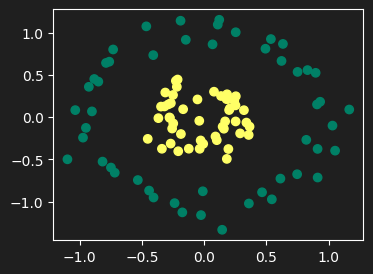

In [41]:
X, y = make_circles(n_samples=100, noise=.1, factor=.3,random_state=0)
X = X.T 
y = y.reshape((y.shape[0],1))
y = y.T
plt.figure(figsize=(4,3))
plt.scatter(X[0,:],X[1,:],c=y, cmap='summer')
plt.show()

In [42]:
def initialisation(*N_layers):

    np.random.seed(1)
    
    parameters = {}
    
    for i in range(1,len(N_layers)):
        parameters[f"W{i}"] = np.random.randn(N_layers[i],N_layers[i-1])
        parameters[f"b{i}"] = np.random.randn(N_layers[i],1)
   
    return dict(sorted(parameters.items()))

parameters = initialisation(2,3,4,1)

In [43]:
parameters

{'W1': array([[ 1.62434536, -0.61175641],
        [-0.52817175, -1.07296862],
        [ 0.86540763, -2.3015387 ]]),
 'W2': array([[-0.24937038,  1.46210794, -2.06014071],
        [-0.3224172 , -0.38405435,  1.13376944],
        [-1.09989127, -0.17242821, -0.87785842],
        [ 0.04221375,  0.58281521, -1.10061918]]),
 'W3': array([[-0.68372786, -0.12289023, -0.93576943, -0.26788808]]),
 'b1': array([[ 1.74481176],
        [-0.7612069 ],
        [ 0.3190391 ]]),
 'b2': array([[1.14472371],
        [0.90159072],
        [0.50249434],
        [0.90085595]]),
 'b3': array([[0.53035547]])}

In [44]:
def forward_propagation(X, parameters):
    
    Z1 = parameters["W1"].dot(X) + parameters["b1"]
    A1 = 1 / (1 + np.exp(-Z1))
    
    activations = {"A1": A1}
    
    for i in range(2,int(len(parameters)/2)+1) :
        Z = parameters[f"W{i}"].dot(activations[f"A{i-1}"]) + parameters[f"b{i}"]
        activations[f"A{i}"] = 1 / (1 + np.exp(-Z))

    return activations

In [45]:
activations = forward_propagation(X,parameters)

In [46]:
activations.keys()

dict_keys(['A1', 'A2', 'A3'])

In [47]:
def log_loss(activations, y):
    eps = 1e-15
    last_activation = list(activations.keys())[-1]
    L = (-1/(y.shape[1])) * np.sum(y * np.log(activations[last_activation] + eps) + (1 - y) * np.log(1 - activations[last_activation] + eps))
    return L

In [48]:
log_loss(activations,y)

0.7048437735873884

In [49]:
def back_propagation(X, y, activations, parameters):
    
    m = y.shape[1]
    
    dz = {}
    gradients = {}
    last_activation = list(activations.keys())[-1]
    
    #dernière couche
    dz[f"dz{int(last_activation[-1])}"] = activations[last_activation] - y
    gradients[f"dW{int(last_activation[-1])}"] = (1/m) * dz[f"dz{int(last_activation[-1])}"].dot(activations[f"A{int(last_activation[-1])-1}"].T)
    gradients[f"db{int(last_activation[-1])}"] = (1/m) * np.sum(dz[f"dz{int(last_activation[-1])}"], axis=1, keepdims=True)
    
    #couches intermédiaires
    for i in range(len(activations)-1,1,-1):
        
        dz[f"dz{i}"] = (parameters[f"W{i+1}"].T).dot(dz[f"dz{i+1}"]) * activations[f"A{i}"]*(1-activations[f"A{i}"])
        gradients[f"dW{i}"] = (1/m) * dz[f"dz{i}"].dot(activations[f"A{i-1}"].T)
        gradients[f"db{i}"] = (1/m) * np.sum(dz[f"dz{i}"], axis=1, keepdims=True)
    
    #première couche
    dz["dz1"] = (parameters["W2"].T).dot(dz["dz2"]) * activations["A1"]*(1-activations["A1"])
    gradients["dW1"] = (1/m) * dz["dz1"].dot(X.T)
    gradients["db1"] = (1/m) * np.sum(dz["dz1"], axis=1, keepdims=True)

    return dict(sorted(gradients.items()))

In [50]:
gradients = back_propagation(X,y,activations,parameters)

In [51]:
for k,v in parameters.items():
    print(k, v.shape)

W1 (3, 2)
W2 (4, 3)
W3 (1, 4)
b1 (3, 1)
b2 (4, 1)
b3 (1, 1)


In [52]:
for k,v in gradients.items():
    print(k, v.shape)

dW1 (3, 2)
dW2 (4, 3)
dW3 (1, 4)
db1 (3, 1)
db2 (4, 1)
db3 (1, 1)


In [53]:
for p,g in zip(parameters.keys(),gradients.keys()):
    print(p,g)
    #parametres[p] -= learning_rate * gradients[g]

W1 dW1
W2 dW2
W3 dW3
b1 db1
b2 db2
b3 db3


In [54]:
def predict(X,parameters):
    activations = forward_propagation(X,parameters)
    last_activation = list(activations.keys())[-1]
    return activations[last_activation] >= 0.5

In [38]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def neural_network(X_train, y_train, *hidden_layers, learning_rate=0.1, n_epochs=100, plot_scores = False, save_freq=10):
    
    first_layer = X_train.shape[0]
    last_layer = y_train.shape[0]
    
    parameters = initialisation(first_layer, *hidden_layers, last_layer)
    
    loss_test = []
    loss_train = []
    accuracy_hist_train = []
    accuracy_hist_test = []
    
    for i in tqdm(range(n_epochs)):
        
        activations = forward_propagation(X_train, parameters)
        
        #calcul des gradients:
        gradients = back_propagation(X_train, y_train, activations, parameters)
        
        #update des gradients:
        for p,g in zip(parameters.keys(),gradients.keys()):
            parameters[p] = parameters[p] - learning_rate * gradients[g]
        
        #calcul du coût et de l'accuracy, tous les 10 pas:
        if i % save_freq == 0:
            # Train
            y_pred = predict(X_train, parameters)
            accuracy_hist_train.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
            loss_train.append(log_loss(activations, y_train))
            
    scores = {
        "loss_train" : loss_train,
        "accuracy_train" : accuracy_hist_train
    }
            
    if plot_scores == True:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.plot(range(len(loss_train)),loss_train, label="Train loss function")
        plt.plot(range(len(loss_test)),loss_test, label="Test loss function")
        plt.title("Loss function")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(range(len(accuracy_hist_train)),accuracy_hist_train, label="Train accuracy")
        plt.plot(range(len(accuracy_hist_test)),accuracy_hist_test, label="Test accuracy")
        plt.title("Accuracy")
        plt.legend()
        plt.show()
    
    return parameters, scores

100%|██████████| 1000/1000 [00:00<00:00, 4545.21it/s]


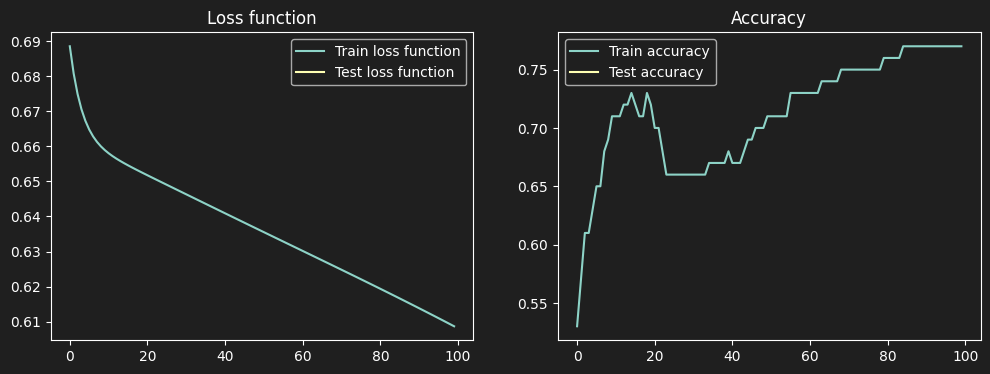

In [39]:
parameters_f, scores = neural_network(X,y,32,8,learning_rate=.01, n_epochs=1000, plot_scores=True)

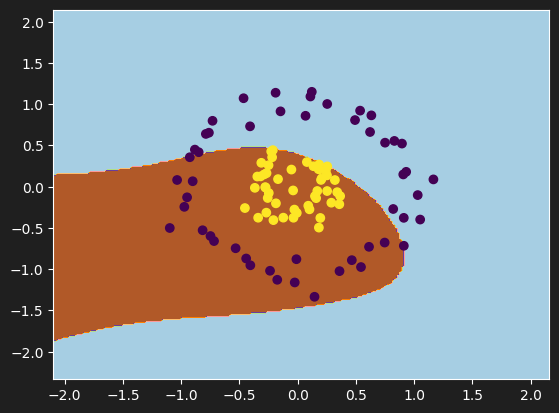

In [18]:
h = .02  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = predict(np.c_[xx1.ravel(), xx2.ravel()].T, parameters_f)

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
ax.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
#ax.axis('off')
plt.scatter(X[0,:],X[1,:],c=y)

plt.show()

## Application cas Chats/Chiens

In [88]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def neural_network(X_train, y_train, X_test, y_test, *hidden_layers, learning_rate=0.1, n_epochs=100, plot_scores = False, save_freq=10):
    
    n_layer0 = X_train.shape[0]
    last_layer = y_train.shape[0]
    
    parameters = initialisation(n_layer0, *hidden_layers, last_layer)
   
    loss_test = []
    loss_train = []
    accuracy_hist_train = []
    accuracy_hist_test = []
    
    for i in tqdm(range(n_epochs)):
            
        activations = forward_propagation(X_train, parameters)
        
        # Gradients calculation:
        gradients = back_propagation(X_train, y_train, activations, parameters)
        
        # Gradients update:
        for p,g in zip(parameters.keys(),gradients.keys()):
            parameters[p] = parameters[p] - learning_rate * gradients[g]
    
        # Train
        y_train_pred = predict(X_train, parameters)
        
        # Test
        y_test_pred = predict(X_test, parameters)
        
        if i % save_freq == 0:
            accuracy_hist_train.append(accuracy_score(y_train.flatten(), y_train_pred.flatten()))
            loss_train.append(log_loss(activations, y_train))
            A_test = forward_propagation(X_test, parameters)
            accuracy_hist_test.append(accuracy_score(y_test.flatten(), y_test_pred.flatten()))
            loss_test.append(log_loss(A_test, y_test))
        
        scores = {
            "loss_test" : loss_test,
            "loss_train" : loss_train,
            "accuracy_test" : accuracy_hist_test,
            "accuracy_train" : accuracy_hist_train
        }
            
    if plot_scores == True:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.plot(range(len(loss_train)), loss_train, label="Train cost function")
        plt.plot(range(len(loss_test)), loss_test, label="Test cost function")
        plt.title("Loss function")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(range(len(accuracy_hist_train)),accuracy_hist_train, label="Train accuracy")
        plt.plot(range(len(accuracy_hist_test)),accuracy_hist_test, label="Test accuracy")
        plt.title("Accuracy")
        plt.legend()
        plt.show()
    
    return parameters, scores

In [56]:
import h5py

def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [74]:
X_train, y_train, X_test, y_test = load_data()

In [75]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1) / X_train.max()
X_train_reshape = X_train_reshape.T

X_test_reshape = X_test.reshape(X_test.shape[0],-1) / X_train.max()
X_test_reshape = X_test_reshape.T

y_train = y_train.T
y_test = y_test.T

100%|██████████| 2000/2000 [00:50<00:00, 39.31it/s]


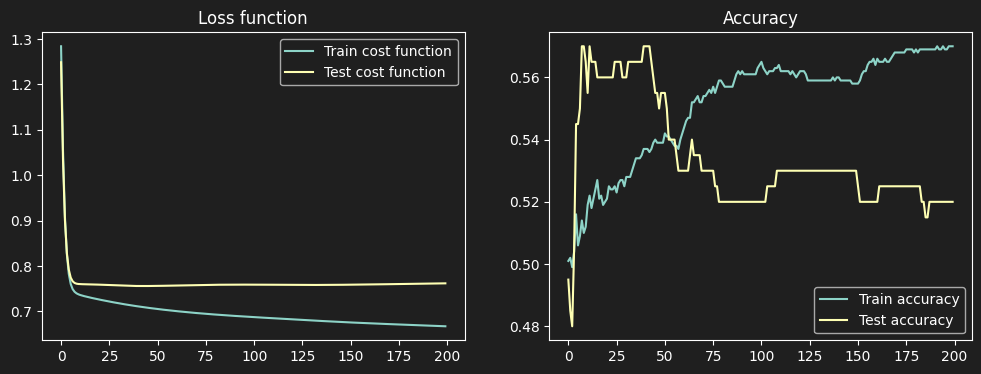

In [89]:
# 2 couches : 64 et 32 neurones
parameters_f_cc, scores_cc = neural_network(X_train_reshape, y_train, X_test_reshape, y_test, 64, 32, learning_rate=0.01, n_epochs=2000, plot_scores=True, save_freq=10)

100%|██████████| 8000/8000 [02:57<00:00, 45.02it/s]


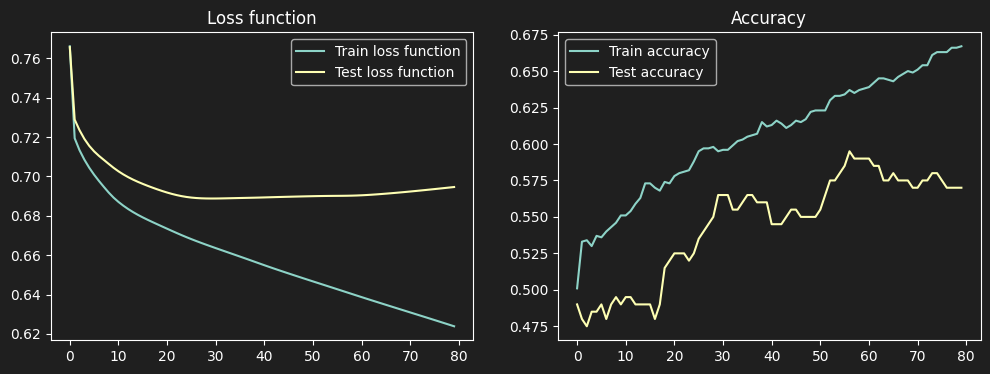

In [236]:
# 3 couches : 64, 32 et 16 neurones
parameters_f_cc, scores_cc = neural_network(X_train_reshape, y_train, X_test_reshape, y_test, 64, 32,16, learning_rate=0.01, n_epochs=8000, plot_scores=True, save_freq=100)

## Because of the ***vanishing gradients***, the results won't get better (overfitting) with additional layers of neurons
### *Avec + de couches, on n'obtiendra pas de meilleurs résultats sur le test (sur-ajustement) -> effet de l'explosion/disparition de gradients*

100%|██████████| 10000/10000 [06:39<00:00, 25.06it/s]


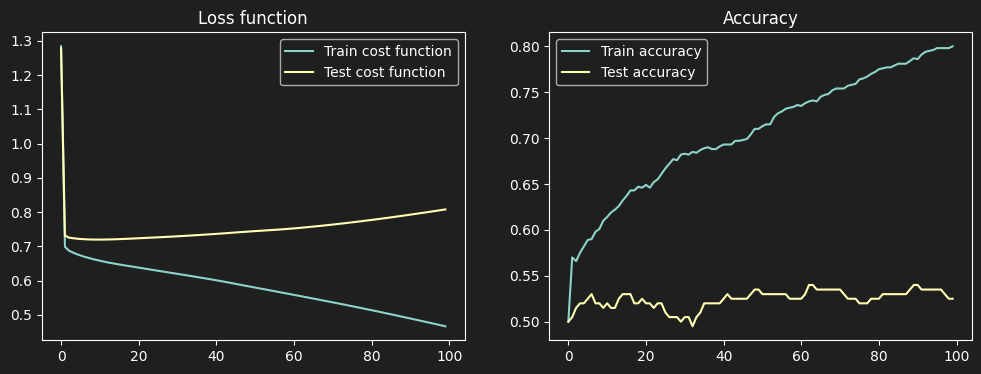

In [90]:
parameters_cc, scores_cc = neural_network(X_train_reshape, y_train, X_test_reshape, y_test, 128, 64, 32,16, learning_rate=0.01, n_epochs=10000, plot_scores=True, save_freq=100)